# SVM

Le SVM ou Support Vector Machine, dans notre cas linéaire, consite à trouver la frontière séparant au mieux deux groupes de points choisis. En terme plus technique, cela revient à intercaler un hyperplan entre deux groupes de points qui maximise la distance entre celui-ci et les points

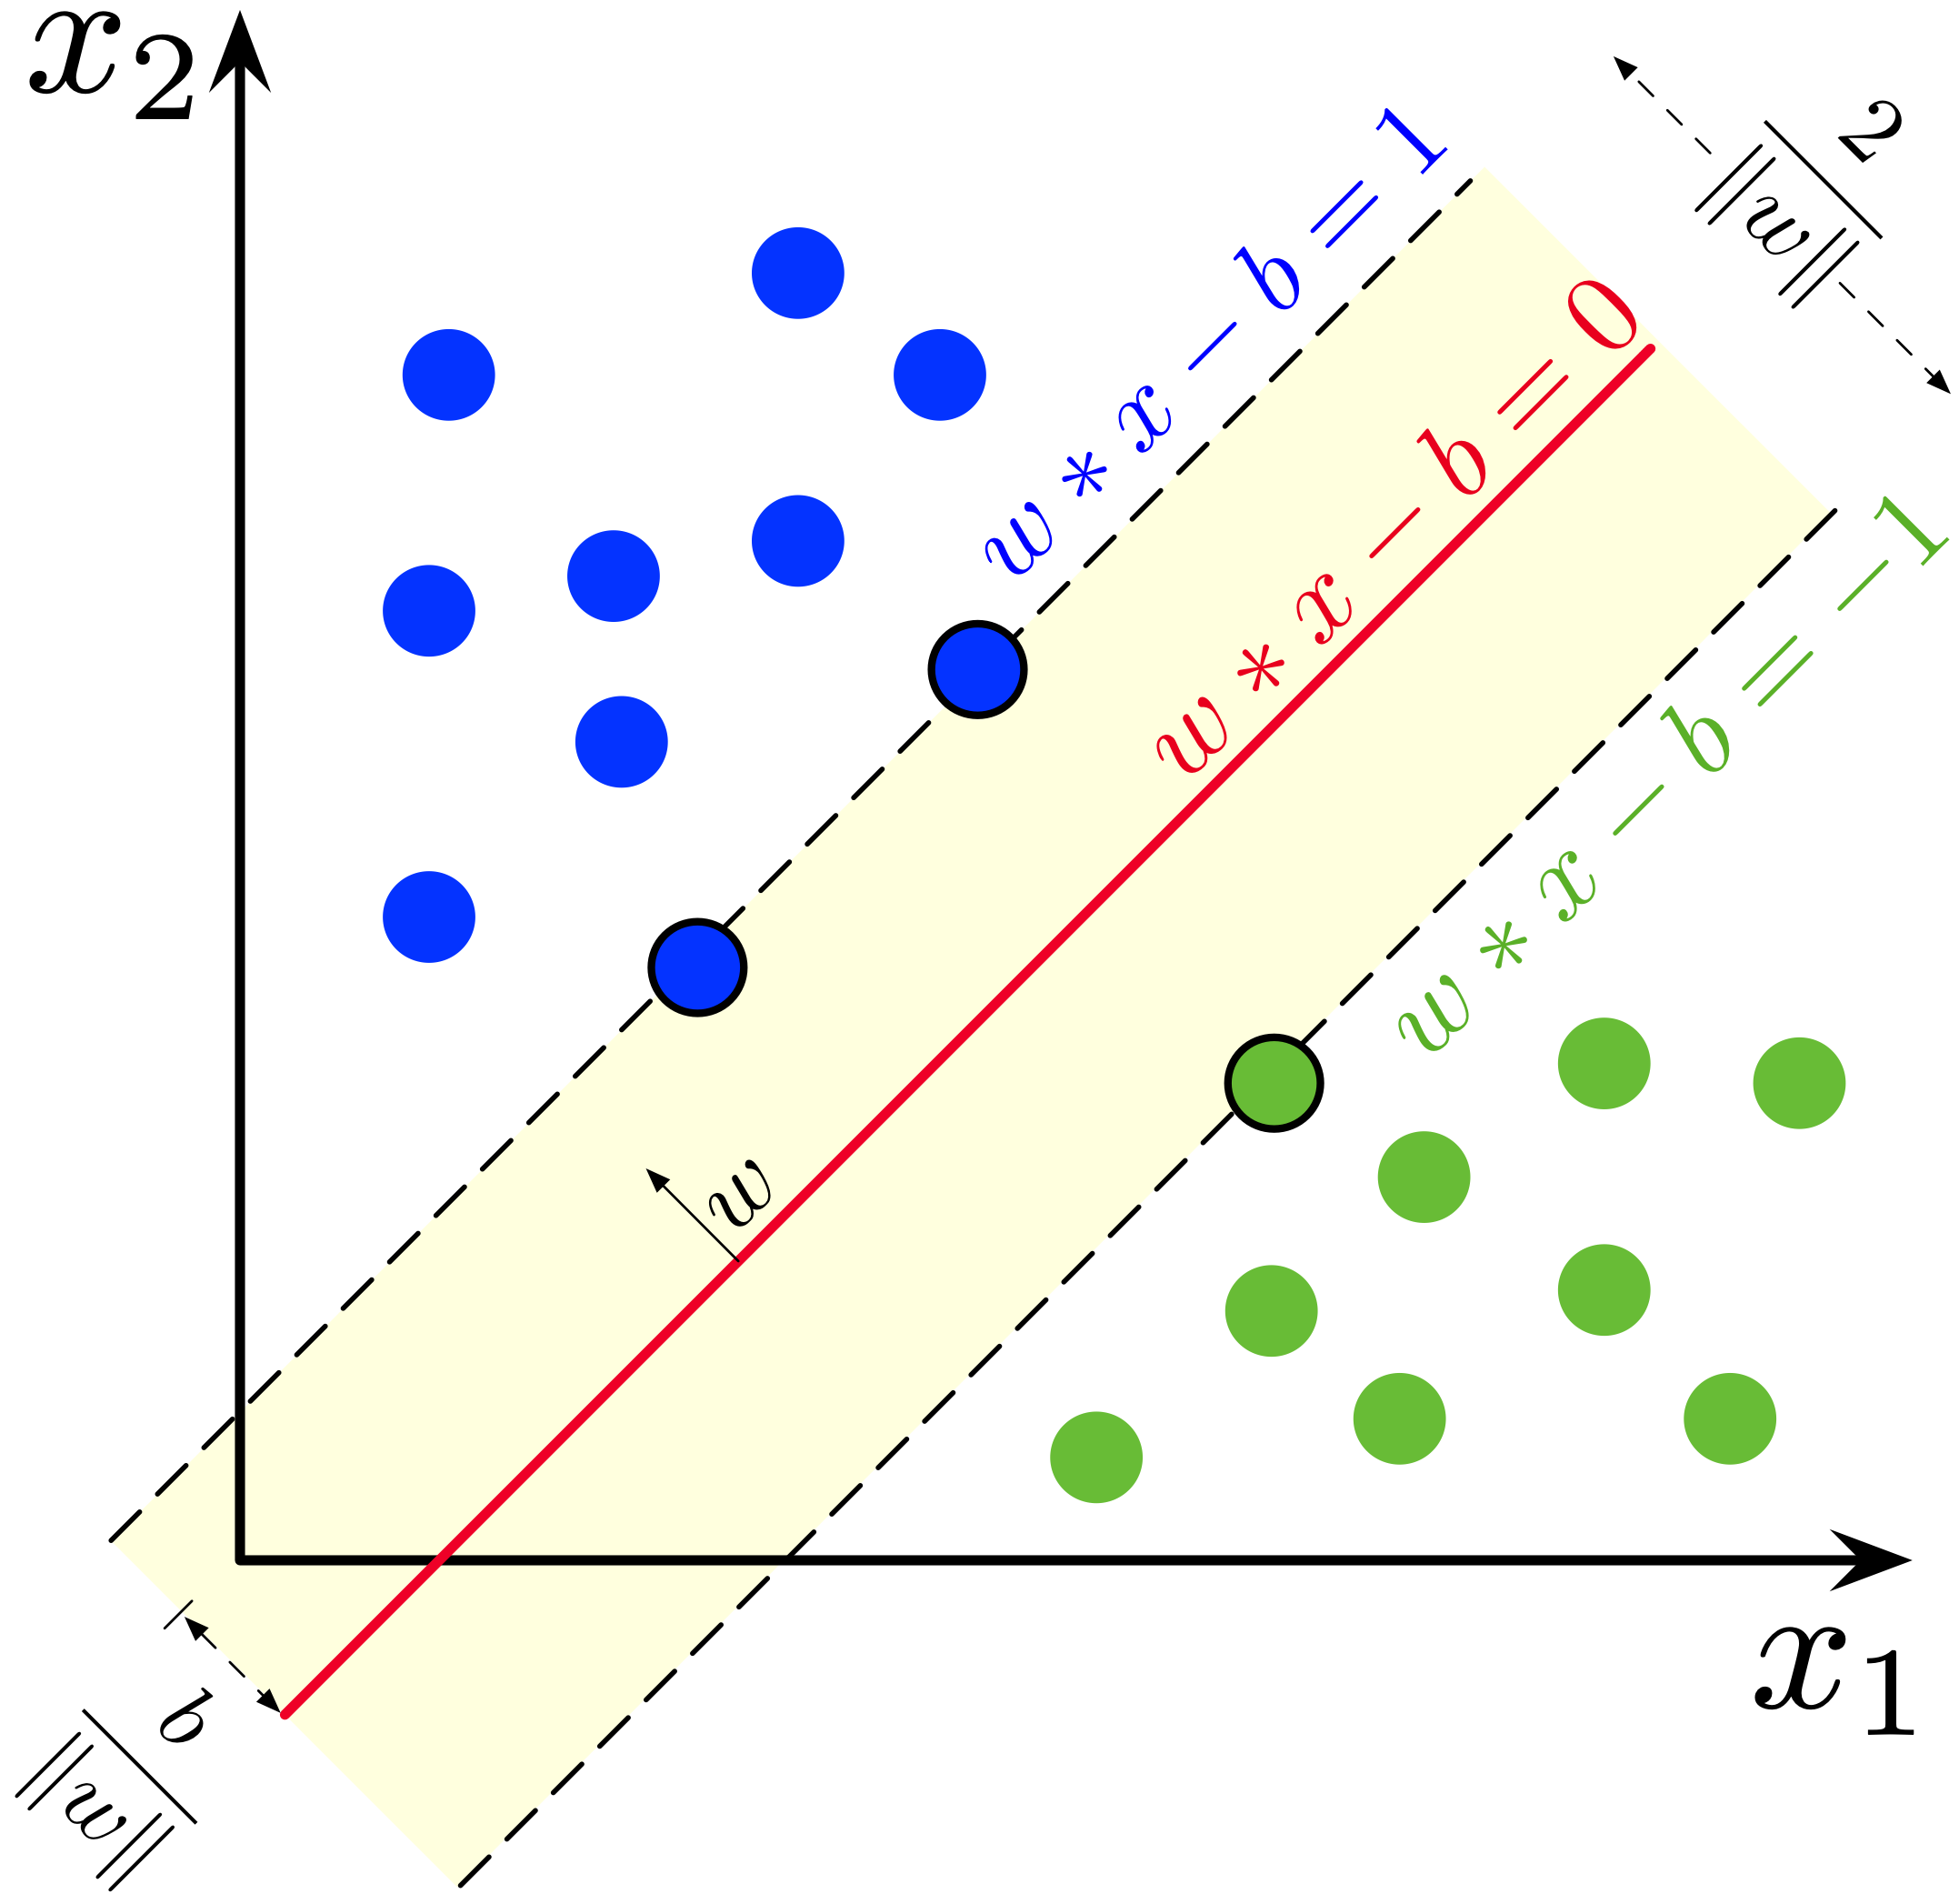

Partie 1: Génération de données aléatoire

Pour pouvoir simuler différentes situations, on va d'abord génèrer des points aléatoirement afin d'avoir une base de données sur laquelle tester le SVM.

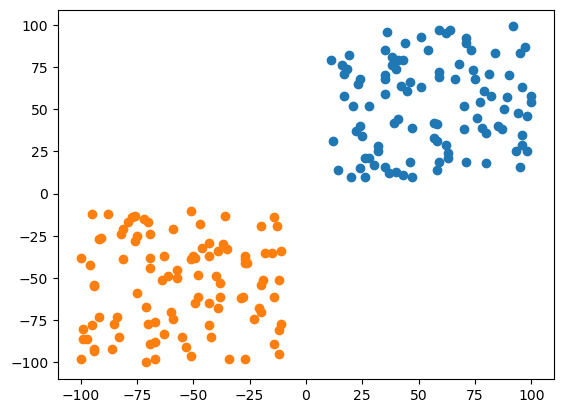

In [4]:
import random
import matplotlib.pyplot as plt
import math

# Fonctions de base ========================================

def separate_coords(groupe_points):
    return [point[0] for point in groupe_points], [point[1] for point in groupe_points]


def moyenne_points(groupe_points):
    somme = [0]*len(groupe_points[0])
    for point in groupe_points:
        somme += point

    return somme/len(groupe_points)


def calcul_vect_opti(groupe1,groupe2):
    m1 = moyenne_points(groupe1)
    m2 = moyenne_points(groupe2)
    return m2-m1


def generer_points(intervalle,pop=100,dim=2):
    return [[random.randint(intervalle[0],intervalle[1]) for d in range(dim)] for p in range(pop)]

# TEST =====================================================

population = 100
dimension = 2

groupe1 = generer_points((10,100))
groupe2 = generer_points((-100,-10))

x, y = separate_coords(groupe1)
plt.scatter(x,y)

x, y = separate_coords(groupe2)
plt.scatter(x,y)

plt.show()

Une fois les données obtenue et groupées avec pouvons appliquer la tecnique du SVM.

Un vecteur normal au plan séparateur calculé est: [110.88, 105.97999999999999]
Les extémités du segments sont les points moyens de chaque groupe m1 = [55.46, 52.07] et m2 = [-55.42, -53.91]

La plan droite optimal à pour équation cartésienne: 110.88*x + 105.97999999999999*y = C


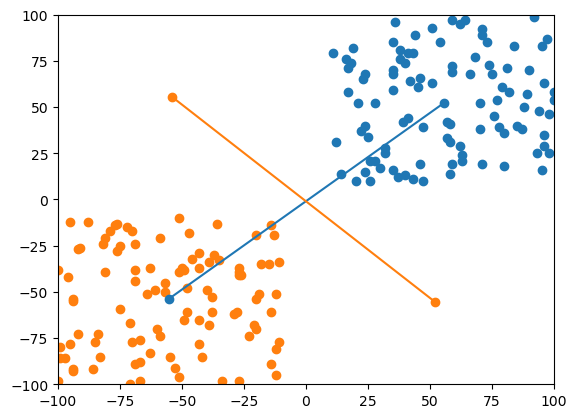

Un vecteur appartenant à l'hyperplan est: [105.97999999999999, -110.88]. Son produit scalaire avec le vecteur normal est 0.0
Si les deux segments ne paraissent pas perpendiculaire, c'est due au graphique qui n'est pas carré.


In [5]:
def moyenne_points(groupe_points):
    dim = len(groupe_points[0])
    nb_points = len(groupe_points)
    somme = [0]*len(groupe_points[0])
    for point in groupe_points:
        for coord in range(dim):
            somme[coord] += point[coord]
        
    for coord in range(dim):
        somme[coord] /= nb_points

    return somme


def diff_vect(vect1,vect2):
    dim = len(vect1)
    v_opti = [0]*dim
    for coord in range(dim):
        v_opti[coord] = vect1[coord] - vect2[coord]

    return v_opti


def produit_scalaire(vect1,vect2):
    dim = len(vect1)
    result = 0
    for i in range(dim):
        result += vect1[i]*vect2[i]

    return result


def calcul_vect_ortho_2d(point1,point2):
    p1 = [0]*2
    p1[0],p1[1] = point1[1],-point1[0]

    p2 = [0]*2
    p2[0],p2[1] = point2[1],-point2[0]

    return p1, p2


def calcul_vect_correction(l_p_moy,l_p_ortho):
    m3 = moyenne_points([l_p_moy[0],l_p_moy[1]])
    p3 = moyenne_points([l_p_ortho[0],l_p_ortho[1]])
    return diff_vect(m3,p3)


def moyenne_et_vect_opti(groupe1,groupe2):
    m1 = moyenne_points(groupe1)
    m2 = moyenne_points(groupe2)
    v_opti = diff_vect(m1,m2)

    print(f"Un vecteur normal au plan séparateur calculé est: {v_opti}")
    print(f"Les extémités du segments sont les points moyens de chaque groupe m1 = {m1} et m2 = {m2}")
    print()
    print(f"La plan droite optimal à pour équation cartésienne: {v_opti[0]}*x + {v_opti[1]}*y = C")
    return m1,m2,v_opti

# TEST ===========================================

m1,m2,v_opti = moyenne_et_vect_opti(groupe1,groupe2)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

x, y = [m1[0],m2[0]], [m1[1],m2[1]]
plt.plot(x,y, marker = "o")

p1, p2 = calcul_vect_ortho_2d(m1,m2)
x, y = [p1[0],p2[0]],[p1[1],p2[1]]
plt.plot(x,y, marker = "o")

plt.axis((-100,100,-100,100))
plt.show()

v_ortho = diff_vect(p1,p2)
result = produit_scalaire(v_ortho,v_opti)

print(f"Un vecteur appartenant à l'hyperplan est: {v_ortho}. Son produit scalaire avec le vecteur normal est {result}")
print("Si les deux segments ne paraissent pas perpendiculaire, c'est due au graphique qui n'est pas carré.")

Voyons maintenant un exemple de répartition de données où l'on ne peut appliquer directement le SVM.

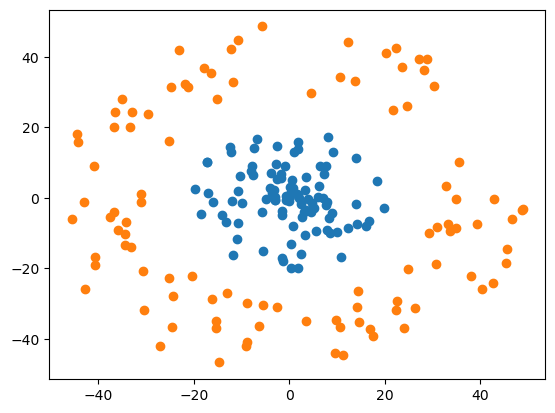

In [6]:
def generer_points_pol(intervalle_rayon=(0,20),population=100):
    l_rayons = [random.randint(intervalle_rayon[0],intervalle_rayon[1]) for i in range(population)]
    l_p_cercle = [random.uniform(0,2*math.pi) for i in range(population)]

    return [[l_rayons[i]*math.cos(l_p_cercle[i]),l_rayons[i]*math.sin(l_p_cercle[i])] for i in range(population)]


# TEST ==========================================

groupe1 = generer_points_pol()
groupe2 = generer_points_pol((30,50))

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

plt.show()

On peut toujours essayer de manière directe, mais le résultat ne sera pas au rendez-vous.

Un vecteur normal au plan séparateur calculé est: [0.9903263079957635, 3.254790389132768]
Les extémités du segments sont les points moyens de chaque groupe m1 = [-0.14907440115825019, -0.1456724122195728] et m2 = [-1.1394007091540137, -3.400462801352341]

La plan droite optimal à pour équation cartésienne: 0.9903263079957635*x + 3.254790389132768*y = C


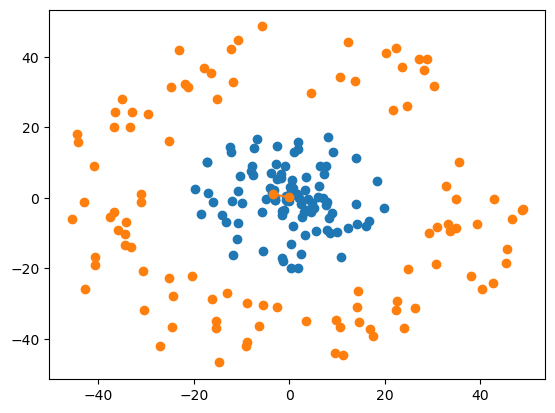

In [7]:
m1, m2, v_opti = moyenne_et_vect_opti(groupe1,groupe2)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

x, y = [m1[0],m2[0]], [m1[1],m2[1]]
plt.plot(x,y, marker = "o")

p1, p2 = calcul_vect_ortho_2d(m1,m2)
x, y = [p1[0],p2[0]],[p1[1],p2[1]]
plt.plot(x,y, marker = "o")

# plt.axis((-100,100,-100,100))
plt.show()

Comme nous le disais notre intuition, trouver une droite séparant deux groupes circulaires et fermé est impossible sans couper ces deux groupes en même temps, cependant une frontiére peu bel et bien être déterminée entre les deux groupes. Pour cela, il faut passer en coordonnées polaires et ne considèrer que le rayon, ce qui nous ramènera à un problème de maximisation de marge en 1 dimension.

# 2 - Transformation des données

Pour pouvoir appliquer le SVM dans l'optique de résoudre un problème de ce type, il faut faire subir aux données une transformation. Puisque chaque donnée représente un point, on peut apparenter cela à un changement de base.

Voyons donc cela avec l'exemple des données ci-dessus:

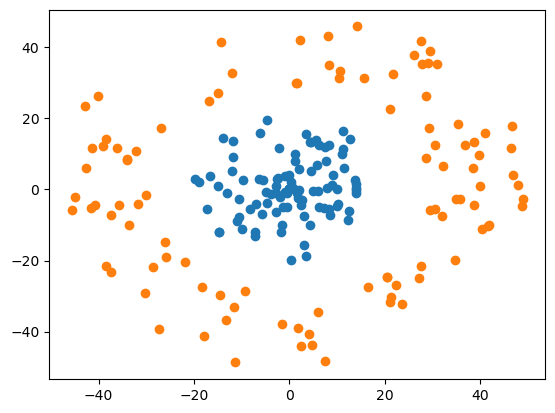

Un vecteur normal au plan séparateur calculé est: [-29.009999999999998, -0.08909735889614981]
Les extémités du segments sont les points moyens de chaque groupe m1 = [10.04, -0.14478106636682603] et m2 = [39.05, -0.055683707470676226]

La plan droite optimal à pour équation cartésienne: -29.009999999999998*x + -0.08909735889614981*y = C


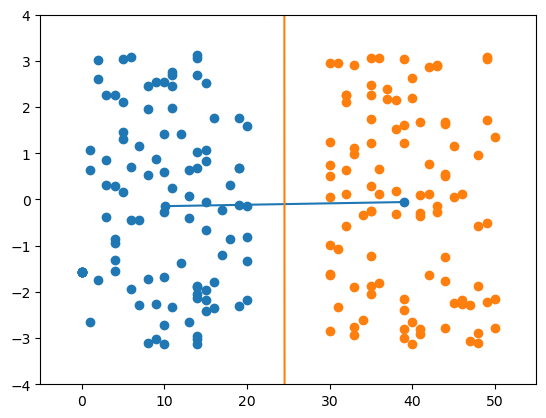

In [8]:
def calcul_angle(point):

    if point[0] > 0:
        if point[1] < 0:
            return math.atan(point[1]/point[0])+2*math.pi
        
        return math.atan(point[1]/point[0])

    if point[0] < 0:
        return math.atan(point[1]/point[0])+math.pi

    if point[0] == 0:
        if point[1] < 0:
            return 3*math.pi/2
    
        return math.pi/2
    

def en_coords_pol_2d(l_points):
    l_rayons = [produit_scalaire(point,point)**(1/2) for point in l_points]

    l_angles = [calcul_angle(point)-math.pi for point in l_points]

    return [[l_rayons[i],l_angles[i]] for i in range(len(l_rayons))]


# TEST ===========================================

groupe1 = generer_points_pol((0,20),population=100)
groupe2 = generer_points_pol((30,50),population=100)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

plt.show()

# TRANSFORMATION ===============================

groupe1, groupe2 = en_coords_pol_2d(groupe1),en_coords_pol_2d(groupe2)

m1, m2, v_opti = moyenne_et_vect_opti(groupe1,groupe2)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

x, y = [m1[0],m2[0]], [m1[1],m2[1]]
plt.plot(x,y, marker = "o")

p1, p2 = calcul_vect_ortho_2d(m1,m2)

vect_cor = calcul_vect_correction([m1,m2],[p1,p2])
p1,p2 = diff_vect(p1,[-vect_cor[0],-vect_cor[1]]),diff_vect(p2,[-vect_cor[0],-vect_cor[1]])
x, y = [p1[0],p2[0]],[p1[1],p2[1]]
plt.plot(x,y, marker = "o")

plt.axis((-5,55,-4,4))
plt.show()


# 3 - Cas que le SVM ne peut pas résoudre

Si des points d'un groupe sont melangés avec des points de l'autre groupe, le problème ne peut être résolu de ma,ière satisfaisante.

Un vecteur normal au plan séparateur calculé est: [-7.84, -9.71]
Les extémités du segments sont les points moyens de chaque groupe m1 = [-3.75, -5.39] et m2 = [4.09, 4.32]

La plan droite optimal à pour équation cartésienne: -7.84*x + -9.71*y = C


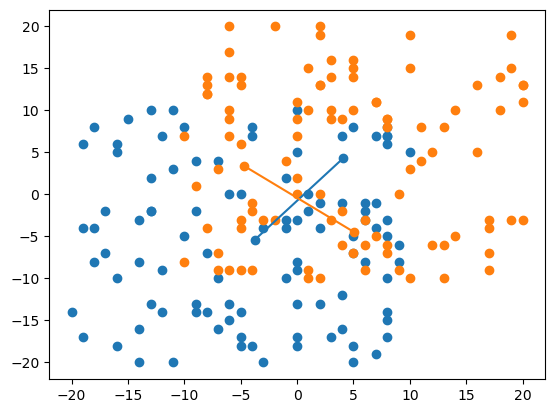

In [9]:
groupe1,groupe2 = generer_points([-20,10]), generer_points([-10,20])

m1, m2, v_opti = moyenne_et_vect_opti(groupe1,groupe2)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

x, y = [m1[0],m2[0]], [m1[1],m2[1]]
plt.plot(x,y, marker = "o")

p1, p2 = calcul_vect_ortho_2d(m1,m2)

vect_cor = calcul_vect_correction([m1,m2],[p1,p2])
p1,p2 = diff_vect(p1,[-vect_cor[0],-vect_cor[1]]),diff_vect(p2,[-vect_cor[0],-vect_cor[1]])
x, y = [p1[0],p2[0]],[p1[1],p2[1]]
plt.plot(x,y, marker = "o")

#plt.axis((-5,55,-1,8))
plt.show()

Si un des groupes rassemble plusieurs groupuscules, le SVM peut rapidement devenir inadapté.

Un vecteur normal au plan séparateur calculé est: [-0.185, -0.6550000000000001]
Les extémités du segments sont les points moyens de chaque groupe m1 = [-0.265, -1.475] et m2 = [-0.08, -0.82]

La plan droite optimal à pour équation cartésienne: -0.185*x + -0.6550000000000001*y = C


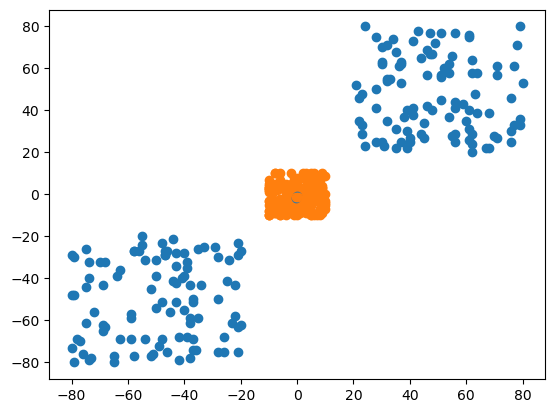

In [10]:
groupe1,groupe2 = generer_points([-80,-20])+generer_points([20,80]), generer_points([-10,10])+generer_points([-10,10])

m1, m2, v_opti = moyenne_et_vect_opti(groupe1,groupe2)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

x, y = [m1[0],m2[0]], [m1[1],m2[1]]
plt.plot(x,y, marker = "o")

p1, p2 = calcul_vect_ortho_2d(m1,m2)

vect_cor = calcul_vect_correction([m1,m2],[p1,p2])
p1,p2 = diff_vect(p1,[-vect_cor[0],-vect_cor[1]]),diff_vect(p2,[-vect_cor[0],-vect_cor[1]])
x, y = [p1[0],p2[0]],[p1[1],p2[1]]
plt.plot(x,y, marker = "o")

#plt.axis((-5,55,-1,8))
plt.show()

On peut passer en coordonnées polaire pour trouver une frontière, mais le SVM reste inadapté car le groupe bleu rassemble en réalité deux clusters de points éloignés.

Un vecteur normal au plan séparateur calculé est: [63.40244687635687, -0.8479049903141715]
Les extémités du segments sont les points moyens de chaque groupe m1 = [71.26146584891181, -0.7947509037695099] et m2 = [7.859018972554942, 0.05315408654466168]

La plan droite optimal à pour équation cartésienne: 63.40244687635687*x + -0.8479049903141715*y = C


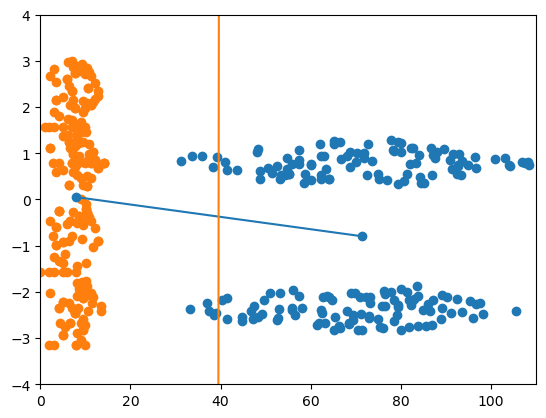

In [11]:
groupe1, groupe2 = en_coords_pol_2d(groupe1),en_coords_pol_2d(groupe2)

m1, m2, v_opti = moyenne_et_vect_opti(groupe1,groupe2)

x1, y1 = separate_coords(groupe1)
plt.scatter(x1,y1)

x2, y2 = separate_coords(groupe2)
plt.scatter(x2,y2)

x, y = [m1[0],m2[0]], [m1[1],m2[1]]
plt.plot(x,y, marker = "o")

p1, p2 = calcul_vect_ortho_2d(m1,m2)

vect_cor = calcul_vect_correction([m1,m2],[p1,p2])
p1,p2 = diff_vect(p1,[-vect_cor[0],-vect_cor[1]]),diff_vect(p2,[-vect_cor[0],-vect_cor[1]])
x, y = [p1[0],p2[0]],[p1[1],p2[1]]
plt.plot(x,y, marker = "o")

plt.axis((0,110,-4,4))
plt.show()